# Below is a Data Analysis project based on Crime Analytics outcomes in San Francisco and Seattle 

The analysis will be based on descriptive datasets found in city governmental websites. The main objective is to find trends and patterns that could be visible involving crimes committed and reported in the city regions.

Firstly we're going to look at both city's datasets, then do some data cleansing. Thereafter, normalizing and joining the data will be done for better analysis procedures. Since this is descriptive data, binning and counts will be made for better clarity. From there, data analysis may proceed.

Secondly we'll create some graphs for clearer storytelling.

Thirdly we will be using some geospatial analysis procedures for better descriptive analysis. 

Lastly comparing similarity between two cities for statistical significance reasons. 

In [1]:
pwd

'/home/tebo/span/capstone'

In [2]:
# Packages will need for the theme
% matplotlib inline

import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sys

#from bokeh.plotting import *
#from bokeh.models import HoverTool
from collections import OrderedDict

YEAR = 2014
PERIOD = "summer"
TYPE = "incidents"
DATA_DIR = "data"
SF = "sanfrancisco"
SEATTLE = "seattle"

In [3]:
# Read in our data. We've aggregated it by date already, so we don't need to worry about paging
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
sf_nrows = sf.shape[0]
print(sf_nrows)
sf.head()

28993


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [4]:
# This is for time series reasons
date = pd.to_datetime(sf['Date'])
print(date.min())
print (date.max())
t_delta = (date - date.min()).astype('timedelta64[D]')
sf['days'] = t_delta
sf.head(1)

2014-06-01 00:00:00
2014-08-31 00:00:00


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,days
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,91.0


In [5]:
# Now for the Seattle dataset 
seattle = pd.read_csv('seattle_incidents_summer_2014.csv')
seattle_nrows = seattle.shape[0]
seattle.head()

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [6]:
# This is also for time series reasons
date = pd.to_datetime(seattle['Date Reported'])
print(date.min())
print(date.max())
t_delta = (date - date.min()).astype('timedelta64[D]')
seattle['days'] = t_delta
seattle.head(1)

2014-06-01 00:13:00
2015-06-28 10:31:00


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,days
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,392.0


In [7]:
# Grouping of categories
sf.groupby('Category').groups.keys()

dict_keys(['FRAUD', 'BURGLARY', 'EMBEZZLEMENT', 'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING', 'MISSING PERSON', 'LOITERING', 'GAMBLING', 'DRUG/NARCOTIC', 'EXTORTION', 'KIDNAPPING', 'WEAPON LAWS', 'DISORDERLY CONDUCT', 'PROSTITUTION', 'FAMILY OFFENSES', 'SECONDARY CODES', 'PORNOGRAPHY/OBSCENE MAT', 'NON-CRIMINAL', 'ARSON', 'ASSAULT', 'TRESPASS', 'LARCENY/THEFT', 'SUSPICIOUS OCC', 'ROBBERY', 'STOLEN PROPERTY', 'RUNAWAY', 'BRIBERY', 'SUICIDE', 'OTHER OFFENSES', 'LIQUOR LAWS', 'WARRANTS', 'DRUNKENNESS', 'VEHICLE THEFT', 'VANDALISM'])

## Data cleaning (Normalization)

In [8]:
# Renamimg of some features for cross analyzing between both datasets 
sf.rename(columns = {"X": "Longitude", "Y": "Latitude", "PdDistrict": "District", "Descript": "Description"}, 
          inplace=True)

In [9]:
# Splitting and creating new features
sf["City"] = pd.Series(['sanfrancisco']*sf.shape[0], index = sf.index)
sf["DayOfMonth"] = sf.Date.map(lambda x: int(x.split("/")[1]))
sf["Month"] = sf.Date.map(lambda x: int(x.split("/")[0]))
sf["Year"] = sf.Date.map(lambda x: int(x.split("/")[2]))

In [10]:
# Function that takes Time as HH:MM and returns an int representing the hour
def time_bin(t, bin_size=30):
    hour, mins = t.split(":")
    return int(hour)
    
sf["TimeBin"] = sf.Time.map(time_bin) 

In [11]:
# Drop features that are obsolete
sf.drop(["IncidntNum", "PdId", "Location", "Resolution"], axis=1, inplace=True, errors="ignore")

In [12]:
sf.head(1)

,Category,Description,DayOfWeek,Date,Time,District,Address,Longitude,Latitude,days,City,DayOfMonth,Month,Year,TimeBin
0,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,91.0,sanfrancisco,31,8,2014,23


In [13]:
# Reindex the DataFrame
columns_index = ["City", "DayOfMonth", "DayOfWeek", "Month", "Year", "Time", "TimeBin",
                    "Longitude", "Latitude", "Address", "District", 
                    "Category", "Description"
                   ]
sf_normalized = sf[columns_index]
sf_normalized.head(1)

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
0,sanfrancisco,31,Sunday,8,2014,23:50,23,-122.405647,37.738322,LOOMIS ST / INDUSTRIAL ST,BAYVIEW,ARSON,ARSON OF A VEHICLE


In [14]:
# Lets drop some columns...
seattle_drop_columns = ["RMS CDW ID", 
                        "General Offense Number", 
                        "Offense Code", 
                        "Offense Code Extension", 
                        "Summary Offense Code",
                        "Census Tract 2000",
                        "Location"
                       ]
seattle.drop(seattle_drop_columns, axis=1, inplace=True, errors="ignore")

In [15]:
# and rename some
seattle.rename(columns = {"Hundred Block Location": "Address", "Offense Type": "Category", 
                          "Summarized Offense Description": "Description",
                          "District/Sector": "District"}, 
               inplace=True)

In [16]:
# Here we normalize seattle's dataset into sf's (City, DayOfMonth, DayOfWeek, Time, TimeBin)
seattle["City"] = pd.Series(['seattle'] * seattle.shape[0], index=seattle.index)
seattle["DayOfMonth"] = seattle["Occurred Date or Date Range Start"].map(lambda x: int(x.split(" ")[0].split("/")[1]))
seattle["DayOfWeek"] = seattle["Occurred Date or Date Range Start"] \
    .map(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%m/%d/%Y").strftime("%A"))
seattle["Time"] = seattle["Occurred Date or Date Range Start"] \
    .map(lambda x: datetime.datetime.strptime(x[11:], "%I:%M:%S %p").strftime("%H:%M"))
seattle["TimeBin"] = seattle.Time.map(time_bin)

In [17]:
# Reindex the DataFrame
seattle_normalized = seattle[columns_index]
seattle_normalized.sample(n=5)

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
4041,seattle,21,Thursday,8,2014,21:30,21,0.000000,0.000000,94XX BLOCK OF 35 AV SW,W,ASSLT-NONAGG,ASSAULT
27657,seattle,16,Monday,6,2014,13:14,13,0.000000,0.000000,1XX BLOCK OF BROADWAY E,E,WARRARR-FELONY,WARRANT ARREST
25041,seattle,23,Monday,6,2014,09:10,9,-122.318225,47.619343,1XX BLOCK OF 11 AV E,C,PROPERTY DAMAGE - GRAFFITI,PROPERTY DAMAGE
15435,seattle,21,Monday,7,2014,00:01,0,-122.386207,47.589959,15XX BLOCK OF CALIFORNIA AV SW,W,THEFT-CARPROWL,CAR PROWL
32736,seattle,1,Sunday,6,2014,04:42,4,-122.324460,47.614092,E PIKE ST / BELMONT AV,E,ASSLT-AGG-WEAPON,ASSAULT


In [18]:
# Normalizing category names (Seattle category names into SF category names)
category_subset = {
    "RECKLESS BURNING": "ARSON",
    "THEFT-OTH": "LARCENY/THEFT",
    "BURGLARY-FORCE-NONRES": "BURGLARY",
    "INJURY - ACCIDENTAL": "OTHER OFFENSES",
    "ANIMAL-BITE": "OTHER OFFENSES",
    "ANIMAL-CRUELTY": "OTHER OFFENSES",
    "ANIMAL-OTH": "OTHER OFFENSES",
    "ASSLT-AGG-BODYFORCE": "ASSAULT",
    "ASSLT-AGG-GUN": "ASSAULT",
    "ASSLT-AGG-POLICE-BODYFORCE": "ASSAULT",
    "ASSLT-AGG-POLICE-GUN": "ASSAULT",
    "ASSLT-AGG-POLICE-WEAPON": "ASSAULT",
    "ASSLT-AGG-WEAPON": "ASSAULT",
    "ASSLT-NONAGG": "ASSAULT",
    "ASSLT-NONAGG-POLICE": "ASSAULT",
    "BIAS INCIDENT": "NON-CRIMINAL",
    "BURGLARY-FORCE-RES": "BURGLARY",
    "BURGLARY-NOFORCE-NONRES": "BURGLARY",
    "BURGLARY-NOFORCE-RES": "BURGLARY",
    "BURGLARY-SECURE PARKING-NONRES": "BURGLARY",
    "BURGLARY-SECURE PARKING-RES": "BURGLARY",
    "COUNTERFEIT": "FORGERY/COUNTERFEITING",
    "DISPUTE-CIVIL PROPERTY (AUTO)": "NON-CRIMINAL",
    "DISPUTE-CIVIL PROPERTY (NON AU": "NON-CRIMINAL",
    "DISPUTE-OTH": "NON-CRIMINAL",
    "DISTURBANCE-NOISE": "NON-CRIMINAL",
    "DISTURBANCE-OTH": "NON-CRIMINAL",
    "DRIVE-BY": "OTHER OFFENSES",
    "DUI-DRUGS": "DRIVING UNDER THE INFLUENCE",
    "DUI-LIQUOR": "DRIVING UNDER THE INFLUENCE",
    "ELUDING-FELONY FLIGHT": "RUNAWAY",
    "EMBEZZLE": "EMBEZZLEMENT",
    "ENDANGERMENT": "OTHER OFFENSES",
    "ESCAPE": "RUNAWAY",
    "FALSE REPORT": "OTHER OFFENSES",
    "FIREWORK-POSSESS": "OTHER OFFENSES",
    "FIREWORK-USE": "OTHER OFFENSES",
    "FORGERY-CHECK": "FORGERY/COUNTERFEITING",
    "FORGERY-CREDIT CARD": "FORGERY/COUNTERFEITING",
    "FORGERY-OTH": "FORGERY/COUNTERFEITING",
    "FRAUD-CHECK": "FRAUD",
    "FRAUD-COMPUTER": "FRAUD",
    "FRAUD-CREDIT CARD": "FRAUD",
    "FRAUD-IDENTITY THEFT": "FRAUD",
    "FRAUD-OTHER": "FRAUD",
    "FRAUD-WIRE-ELECTRONIC": "FRAUD",
    "HARASSMENT": "DISORDERLY CONDUCT",
    "HOMICIDE-JUST-GUN": "ASSAULT",
    "HOMICIDE-JUST-WEAPON": "ASSAULT",
    "HOMICIDE-PREMEDITATED-GUN": "ASSAULT",
    "ILLEGAL DUMPING": "NON-CRIMINAL",
    "INJURY - OTHER": "OTHER OFFENSES",
    "LIQUOR LAW VIOLATION": "LIQUOR LAWS",
    "MALICIOUS HARASSMENT": "DISORDERLY CONDUCT",
    "NARC-DRUG TRAFFIC LOITERING": "DRUG/NARCOTIC",
    "NARC-EQUIPMENT/PARAPHENALIA": "DRUG/NARCOTIC",
    "NARC-FORGERY-PRESCRIPTION": "DRUG/NARCOTIC",
    "NARC-FOUND-AMPHETAMINE": "DRUG/NARCOTIC",
    "NARC-FOUND-COCAINE": "DRUG/NARCOTIC",
    "NARC-FOUND-HEROIN": "DRUG/NARCOTIC",
    "NARC-FOUND-MARIJU": "DRUG/NARCOTIC",
    "NARC-FOUND-METH": "DRUG/NARCOTIC",
    "NARC-FOUND-OPIUM": "DRUG/NARCOTIC",
    "NARC-FOUND-OTHER": "DRUG/NARCOTIC",
    "NARC-FOUND-SYNTHETIC": "DRUG/NARCOTIC",
    "NARC-FRAUD-PRESCRIPTION": "DRUG/NARCOTIC",
    "NARC-POSSESS-AMPHETAMINE": "DRUG/NARCOTIC",
    "NARC-POSSESS-COCAINE": "DRUG/NARCOTIC",
    "NARC-POSSESS-HALLUCINOGEN": "DRUG/NARCOTIC",
    "NARC-POSSESS-HEROIN": "DRUG/NARCOTIC",
    "NARC-POSSESS-MARIJU": "DRUG/NARCOTIC",
    "NARC-POSSESS-METH": "DRUG/NARCOTIC",
    "NARC-POSSESS-OTHER": "DRUG/NARCOTIC",
    "NARC-POSSESS-PILL/TABLET": "DRUG/NARCOTIC",
    "NARC-PRODUCE-MARIJU": "DRUG/NARCOTIC",
    "NARC-SELL-AMPHETAMINE": "DRUG/NARCOTIC",
    "NARC-SELL-COCAINE": "DRUG/NARCOTIC",
    "NARC-SELL-HEROIN": "DRUG/NARCOTIC",
    "NARC-SELL-MARIJU": "DRUG/NARCOTIC",
    "NARC-SELL-METH": "DRUG/NARCOTIC",
    "NARC-SELL-SYNTHETIC": "DRUG/NARCOTIC",
    "NARC-SMUGGLE-OTHER": "DRUG/NARCOTIC",
    "OBSTRUCT": "OTHER OFFENSES",
    "PORNOGRAPHY-OBSCENE MATERIAL": "PORNOGRAPHY/OBSCENE MAT",
    "PROP RECOVERED-OTHER AGENCY": "STOLEN PROPERTY",
    "PROPERTY DAMAGE - GRAFFITI": "VANDALISM",
    "PROPERTY DAMAGE-NON RESIDENTIA": "VANDALISM",
    "PROPERTY DAMAGE-RESIDENTIAL": "VANDALISM",
    "PROPERTY FOUND": "STOLEN PROPERTY",
    "PROPERTY LOST": "STOLEN PROPERTY",
    "PROPERTY LOST - POLICE EQUIPME": "STOLEN PROPERTY",
    "PROPERTY STOLEN-POSSESS": "STOLEN PROPERTY",
    "PROPERTY STOLEN-SELL": "STOLEN PROPERTY",
    "PROPERTY STOLEN-TRAFFICKING": "STOLEN PROPERTY",
    "PROSTITUTION LOITERING": "PROSTITUTION",
    "PROSTITUTION PATRONIZING": "PROSTITUTION",
    "PROSTITUTION-ASSIST-PROMOTE": "PROSTITUTION",
    "ROBBERY-BANK-BODYFORCE": "ROBBERY",
    "ROBBERY-BANK-GUN": "ROBBERY",
    "ROBBERY-BANK-WEAPON": "ROBBERY",
    "ROBBERY-BUSINESS-BODYFORCE": "ROBBERY",
    "ROBBERY-BUSINESS-GUN": "ROBBERY",
    "ROBBERY-BUSINESS-WEAPON": "ROBBERY",
    "ROBBERY-RESIDENCE-BODYFORCE": "ROBBERY",
    "ROBBERY-RESIDENCE-GUN": "ROBBERY",
    "ROBBERY-RESIDENCE-WEAPON": "ROBBERY",
    "ROBBERY-STREET-BODYFORCE": "ROBBERY",
    "ROBBERY-STREET-GUN": "ROBBERY",
    "ROBBERY-STREET-WEAPON": "ROBBERY",
    "THEFT OF SERVICES": "LARCENY/THEFT",
    "THEFT-AUTO PARTS": "LARCENY/THEFT",
    "THEFT-AUTOACC": "LARCENY/THEFT",
    "THEFT-BICYCLE": "LARCENY/THEFT",
    "THEFT-BOAT": "LARCENY/THEFT",
    "THEFT-BUILDING": "LARCENY/THEFT",
    "THEFT-CARPROWL": "LARCENY/THEFT",
    "THEFT-COINOP": "LARCENY/THEFT",
    "THEFT-LICENSE PLATE": "LARCENY/THEFT",
    "THEFT-MAIL": "LARCENY/THEFT",
    "THEFT-PKPOCKET": "LARCENY/THEFT",
    "THEFT-PRSNATCH": "LARCENY/THEFT",
    "THEFT-SHOPLIFT": "LARCENY/THEFT",
    "THREATS-KILL": "ASSAULT",
    "THREATS-OTHER": "OTHER OFFENSES",
    "THREATS-WEAPON": "ASSAULT",
    "TRAFFIC": "OTHER OFFENSES",
    "URINATING/DEFECATING-IN PUBLIC": "DISORDERLY CONDUCT",
    "VEH-RCVD-FOR OTHER AGENCY": "VEHICLE THEFT",
    "VEH-THEFT-AUTO": "VEHICLE THEFT",
    "VEH-THEFT-MTRCYCLE": "VEHICLE THEFT",
    "VEH-THEFT-OTHVEH": "VEHICLE THEFT",
    "VEH-THEFT-TRAILER": "VEHICLE THEFT",
    "VEH-THEFT-TRUCK": "VEHICLE THEFT",
    "VIOL-COURT ORDER": "OTHER OFFENSES",
    "WARRANT-FUGITIVE": "WARRANTS",
    "WARRARR-FELONY": "WARRANTS",
    "WARRARR-MISDEMEANOR": "WARRANTS",
    "WEAPON-CONCEALED": "WEAPON LAWS",
    "WEAPON-DISCHARGE": "WEAPON LAWS",
    "WEAPON-POSSESSION": "WEAPON LAWS",
    "WEAPON-SELLING": "WEAPON LAWS",
    "WEAPON-SURRENDER-EXCLUDING FIR": "WEAPON LAWS",
    "WEAPON-UNLAWFUL USE": "WEAPON LAWS",
    "[INC - CASE DC USE ONLY]": "OTHER OFFENSES"
}
for category, subset in category_subset.items():
    seattle_normalized.loc[seattle_normalized["Category"] == category, "Category"] = subset

sf_categories = set(sf_normalized["Category"].tolist())
seattle_categories = set(seattle_normalized["Category"].tolist())
#print "SF crime categories: %s " % ",".join(sorted(sf_categories))
#print "Seattle crime categories: %s" % ",".join(sorted(seattle_categories))
assert seattle_categories <= sf_categories

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### The data normalizing process is almost done, we just need to make sure by camparing specific columns 

In [19]:
# Compare DayOfWeek of sf_normalized & seattle_normalized columns   
sf_normalized[(sf_normalized['DayOfWeek'] == 'Sunday') & (sf_normalized['Category'] == 'ARSON')]

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
0,sanfrancisco,31,Sunday,8,2014,23:50,23,-122.405647,37.738322,LOOMIS ST / INDUSTRIAL ST,BAYVIEW,ARSON,ARSON OF A VEHICLE
200,sanfrancisco,31,Sunday,8,2014,12:00,12,-122.427416,37.781811,1100 Block of LAGUNA ST,NORTHERN,ARSON,ARSON OF AN INHABITED DWELLING
2474,sanfrancisco,24,Sunday,8,2014,04:35,4,-122.419673,37.789669,1400 Block of PINE ST,NORTHERN,ARSON,ARSON
4584,sanfrancisco,17,Sunday,8,2014,18:45,18,-122.441937,37.774407,1500 Block of HAYES ST,PARK,ARSON,ARSON
14055,sanfrancisco,20,Sunday,7,2014,04:00,4,-122.418902,37.727628,SILLIMAN ST / CAMBRIDGE ST,BAYVIEW,ARSON,ARSON OF A VEHICLE
16176,sanfrancisco,13,Sunday,7,2014,06:53,6,-122.402757,37.748111,2500 Block of MARIN ST,BAYVIEW,ARSON,ARSON OF A VEHICLE
16226,sanfrancisco,13,Sunday,7,2014,00:20,0,-122.473644,37.715554,100 Block of FONT BL,TARAVAL,ARSON,ARSON
22581,sanfrancisco,22,Sunday,6,2014,17:59,17,-122.403405,37.775421,800 Block of BRYANT ST,SOUTHERN,ARSON,ARSON
22666,sanfrancisco,22,Sunday,6,2014,12:14,12,-122.438303,37.803634,0 Block of CERVANTES BL,NORTHERN,ARSON,ARSON
22677,sanfrancisco,22,Sunday,6,2014,11:19,11,-122.398006,37.786501,200 Block of 2ND ST,SOUTHERN,ARSON,ARSON


In [20]:
seattle_normalized[(seattle_normalized['DayOfWeek'] == 'Sunday') & (seattle_normalized['Category'] == 'ARSON')]

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
32707,seattle,1,Sunday,6,2014,10:53,10,-122.316845,47.614684,15XX BLOCK OF 12 AV,E,ARSON,RECKLESS BURNING
32708,seattle,1,Sunday,6,2014,10:53,10,0.000000,0.000000,15XX BLOCK OF 12 AV,C,ARSON,RECKLESS BURNING


In [21]:
sf_normalized[['Description', 'DayOfWeek', 'Time', 'District', ]].head()

,Description,DayOfWeek,Time,District
0,ARSON OF A VEHICLE,Sunday,23:50,BAYVIEW
1,LOST PROPERTY,Sunday,23:45,MISSION
2,GRAND THEFT FROM LOCKED AUTO,Sunday,23:30,SOUTHERN
3,GRAND THEFT FROM LOCKED AUTO,Sunday,23:30,RICHMOND
4,FOUND PROPERTY,Sunday,23:23,RICHMOND


In [22]:
seattle_normalized[['Description', 'DayOfWeek', 'Time', 'District', ]].head()

,Description,DayOfWeek,Time,District
0,BURGLARY,Saturday,10:31,J
1,FRAUD,Sunday,00:00,C
2,MAIL THEFT,Sunday,09:00,F
3,COUNTERFEIT,Friday,13:38,M
4,OTHER PROPERTY,Sunday,11:59,J


In [23]:
sf_normalized.loc[1000, ['Description', 'Time']]

Description    DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL
Time                                                  01:45
Name: 1000, dtype: object

In [24]:
seattle_normalized.loc[1000, ['Description', 'Time']]

Description    STOLEN PROPERTY
Time                     12:40
Name: 1000, dtype: object

### Check if the categories from the two cities are the same (1:1 ratio). If all is well, we're good to do. 

In [25]:
sf_categories

{'ARSON',
 'ASSAULT',
 'BRIBERY',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FAMILY OFFENSES',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'MISSING PERSON',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'ROBBERY',
 'RUNAWAY',
 'SECONDARY CODES',
 'STOLEN PROPERTY',
 'SUICIDE',
 'SUSPICIOUS OCC',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS'}

In [26]:
seattle_categories

{'ARSON',
 'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'EMBEZZLEMENT',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'ROBBERY',
 'RUNAWAY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS'}

### Now we join the above two normalized datasets

In [65]:
# Joining process
dataset = pd.concat([sf_normalized, seattle_normalized])
total_nrows = dataset.shape[0]
#print "Total number of rows after union: %d" % total_nrows
assert total_nrows == sf_nrows + seattle_nrows

dataset.head()  

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
0,sanfrancisco,31,Sunday,8,2014,23:50,23,-122.405647,37.738322,LOOMIS ST / INDUSTRIAL ST,BAYVIEW,ARSON,ARSON OF A VEHICLE
1,sanfrancisco,31,Sunday,8,2014,23:45,23,-122.435012,37.761768,400 Block of CASTRO ST,MISSION,NON-CRIMINAL,LOST PROPERTY
2,sanfrancisco,31,Sunday,8,2014,23:30,23,-122.409795,37.780036,1000 Block of MISSION ST,SOUTHERN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO
3,sanfrancisco,31,Sunday,8,2014,23:30,23,-122.485263,37.772518,FULTON ST / 26TH AV,RICHMOND,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO
4,sanfrancisco,31,Sunday,8,2014,23:23,23,-122.509895,37.772313,800 Block of LA PLAYA ST,RICHMOND,NON-CRIMINAL,FOUND PROPERTY


/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


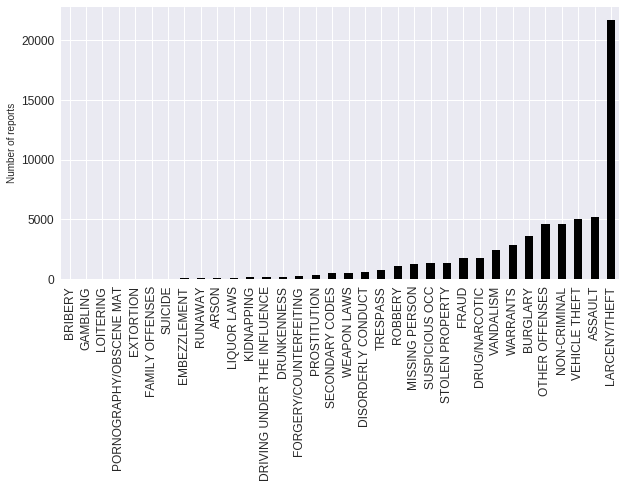

In [28]:
# Plotting number of reports (y) with each crime (x)
def plotdata(data, cat):
    l=data.groupby(cat).size()
    l.sort()
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='k')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)

plotdata(dataset,'Category')

There could be a number of reasons for the above graphs' outcome. One of them could be: It seems that the more trivial the crime, the more incidences are reported. Unless there is some other causation, this notion could stand. Another reason could be that the riskier the crime, the less reported incidences.    

In [29]:
# Below we create a district function based on the types of destricts in a city
def types_districts(dataset,per):
    
    # Group by crime type and district 
    hoods_per_type = dataset.groupby('Description').District.value_counts(sort=True)
    t = hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum = t.sum(axis=0)
    hood_sum.sort(ascending=False)
    t = t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum = t.sum(axis=1)
    crime_sum.sort()
    
    # Large number, so let's slice the data.
    p = np.percentile(crime_sum,per)
    ix = crime_sum[crime_sum > p]
    t = t.loc[ix.index]
    return t
    
t=types_districts(dataset,96)

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


## TimeSeries

In [30]:
# Let's drill down onto one {Larceny/Theft because it has the most reported cases}
cat = sf[sf['Category']=='LARCENY/THEFT']

# Bin crime by 30 day window
cat['Month'] = np.floor(cat['days']/30) # Approximate month (30 day window)

# Default
district = 'All'

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
def timeseries(dat,per):
    ''' Category grouped by month '''
    
    # Group by crime type and district 
    cat_per_time = dat.groupby('Month').Description.value_counts(sort=True)
    t=cat_per_time.unstack().fillna(0)
        
    # Filter by crime per district
    crime_sum=t.sum(axis = 0)
    crime_sum.sort()
    
    # Large number, so let's slice the data.
    p = np.percentile(crime_sum,per)
    ix = crime_sum[crime_sum > p]
    t = t[ix.index]
    return t
    
t_all = timeseries(cat, 0)
t_all

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


Description,THEFT OF WRITTEN INSTRUMENT,ATTEMPTED THEFT FROM UNLOCKED VEHICLE,ATTEMPTED GRAND THEFT FROM PERSON,ATTEMPTED PETTY THEFT OF PROPERTY,ATTEMPTED THEFT OF A BICYCLE,ATTEMPTED SHOPLIFTING,THEFT OF ANIMALS (GENERAL),ATTEMPTED THEFT FROM A BUILDING,GRAND THEFT PURSESNATCH,PETTY THEFT AUTO STRIP,...,GRAND THEFT PICKPOCKET,GRAND THEFT FROM A BUILDING,GRAND THEFT FROM PERSON,PETTY THEFT SHOPLIFTING,PETTY THEFT FROM A BUILDING,GRAND THEFT OF PROPERTY,GRAND THEFT FROM UNLOCKED AUTO,PETTY THEFT FROM LOCKED AUTO,PETTY THEFT OF PROPERTY,GRAND THEFT FROM LOCKED AUTO
Month,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,4.0,...,77.0,69.0,93.0,129.0,136.0,139.0,180.0,283.0,327.0,1014.0
1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,2.0,...,70.0,89.0,94.0,123.0,141.0,152.0,223.0,326.0,362.0,1210.0
2.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,4.0,6.0,...,75.0,116.0,129.0,122.0,164.0,187.0,252.0,326.0,403.0,1449.0
3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,12.0,3.0,5.0,5.0,10.0,7.0,26.0,20.0,33.0,93.0


In [32]:
t_all.describe()

Description,THEFT OF WRITTEN INSTRUMENT,ATTEMPTED THEFT FROM UNLOCKED VEHICLE,ATTEMPTED GRAND THEFT FROM PERSON,ATTEMPTED PETTY THEFT OF PROPERTY,ATTEMPTED THEFT OF A BICYCLE,ATTEMPTED SHOPLIFTING,THEFT OF ANIMALS (GENERAL),ATTEMPTED THEFT FROM A BUILDING,GRAND THEFT PURSESNATCH,PETTY THEFT AUTO STRIP,...,GRAND THEFT PICKPOCKET,GRAND THEFT FROM A BUILDING,GRAND THEFT FROM PERSON,PETTY THEFT SHOPLIFTING,PETTY THEFT FROM A BUILDING,GRAND THEFT OF PROPERTY,GRAND THEFT FROM UNLOCKED AUTO,PETTY THEFT FROM LOCKED AUTO,PETTY THEFT OF PROPERTY,GRAND THEFT FROM LOCKED AUTO
count,4.00000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.50000,0.5,0.750000,0.750000,1.250000,1.250000,1.750000,1.750000,2.75,3.000000,...,58.500000,69.250000,80.250000,94.750000,112.750000,121.250000,170.250000,238.750000,281.250000,941.500000
std,0.57735,1.0,0.957427,0.957427,1.258306,0.957427,2.217356,1.707825,1.50,2.581989,...,31.139471,48.182812,52.885883,59.913132,69.576696,78.817828,100.612706,147.235356,168.389182,592.974704
min,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,...,12.000000,3.000000,5.000000,5.000000,10.000000,7.000000,26.000000,20.000000,33.000000,93.000000
25%,0.00000,0.0,0.000000,0.000000,0.750000,0.750000,0.750000,0.750000,1.75,1.500000,...,55.500000,52.500000,71.000000,92.750000,104.500000,106.000000,141.500000,217.250000,253.500000,783.750000
50%,0.50000,0.0,0.500000,0.500000,1.000000,1.500000,1.000000,1.500000,3.00,3.000000,...,72.500000,79.000000,93.500000,122.500000,138.500000,145.500000,201.500000,304.500000,344.500000,1112.000000
75%,1.00000,0.5,1.250000,1.250000,1.500000,2.000000,2.000000,2.500000,4.00,4.500000,...,75.500000,95.750000,102.750000,124.500000,146.750000,160.750000,230.250000,326.000000,372.250000,1269.750000
max,1.00000,2.0,2.000000,2.000000,3.000000,2.000000,5.000000,4.000000,4.00,6.000000,...,77.000000,116.000000,129.000000,129.000000,164.000000,187.000000,252.000000,326.000000,403.000000,1449.000000


It seems, as we move further down the LARCENY/THEFT category, the higher the mean and variance. This might be due to the ordering of the chosen category (from least to most reported).     

In [33]:
# Lets use real dates for plotting
days_from_start = pd.Series(t_all.index * 30).astype('timedelta64[D]')
dates_for_plot = date.min() + days_from_start
time_labels = dates_for_plot.map(lambda x: str(x.year) + '-' + str(x.month))
time_labels

0    2014-6
1    2014-7
2    2014-7
3    2014-8
Name: Month, dtype: object

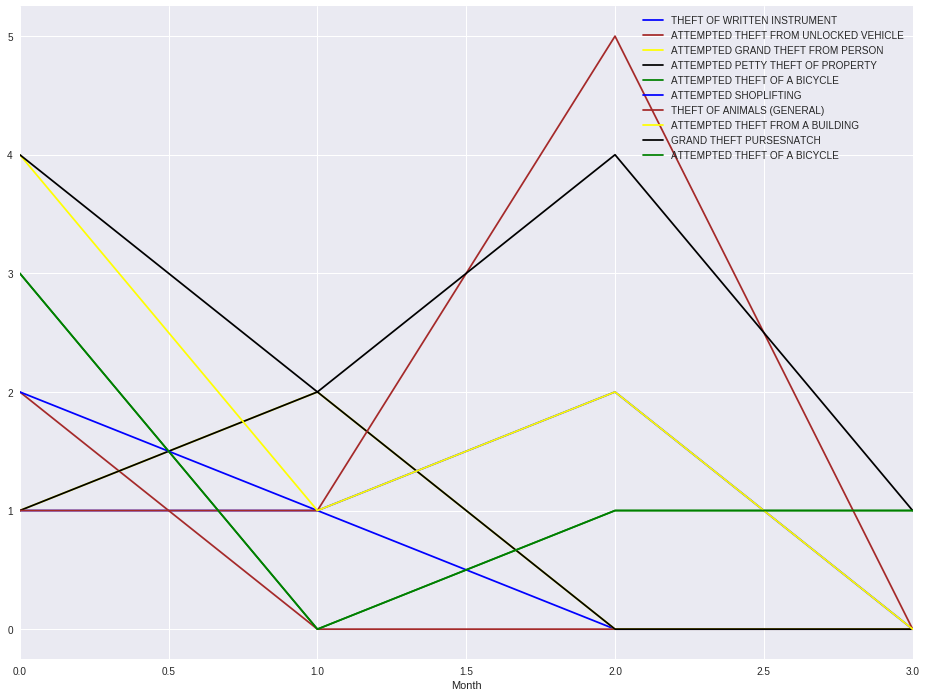

In [34]:
# First 10 Descriptions from t_all dataframe

t_all['THEFT OF WRITTEN INSTRUMENT'].plot(figsize = (16, 12), legend = True, color = 'blue')
t_all['ATTEMPTED THEFT FROM UNLOCKED VEHICLE'].plot(figsize = (16, 12), legend = True, color = 'brown')
t_all['ATTEMPTED GRAND THEFT FROM PERSON'].plot(figsize = (16, 12), legend = True, color = 'yellow')
t_all['ATTEMPTED PETTY THEFT OF PROPERTY'].plot(figsize = (16, 12), legend = True, color = 'black')
t_all['ATTEMPTED THEFT OF A BICYCLE'].plot(figsize = (16, 12), legend = True, color = 'green')
t_all['ATTEMPTED SHOPLIFTING'].plot(figsize = (16, 12), legend = True, color = 'blue')
t_all['THEFT OF ANIMALS (GENERAL)'].plot(figsize = (16, 12), legend = True, color = 'brown')
t_all['ATTEMPTED THEFT FROM A BUILDING'].plot(figsize = (16, 12), legend = True, color = 'yellow')
t_all['GRAND THEFT PURSESNATCH'].plot(figsize = (16, 12), legend = True, color = 'black')
t_all['ATTEMPTED THEFT OF A BICYCLE'].plot(figsize = (16, 12), legend = True, color = 'green')


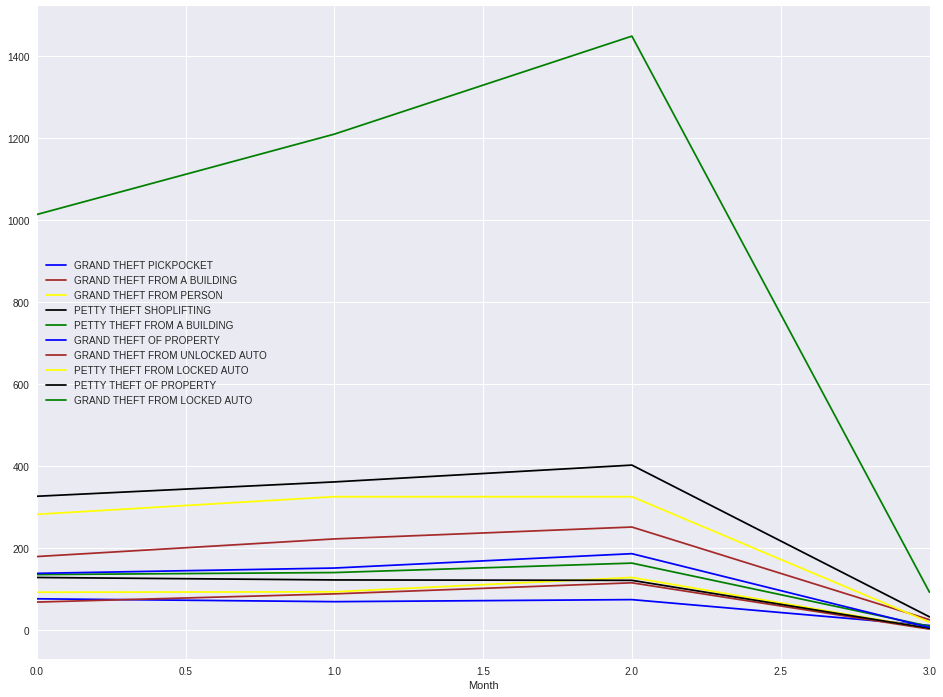

In [35]:
# Last 10 Descriptions from t_all dataframe

t_all['GRAND THEFT PICKPOCKET'].plot(figsize = (16, 12), legend = True, color = 'blue')
t_all['GRAND THEFT FROM A BUILDING'].plot(figsize = (16, 12), legend = True, color = 'brown')
t_all['GRAND THEFT FROM PERSON'].plot(figsize = (16, 12), legend = True, color = 'yellow')
t_all['PETTY THEFT SHOPLIFTING'].plot(figsize = (16, 12), legend = True, color = 'black')
t_all['PETTY THEFT FROM A BUILDING'].plot(figsize = (16, 12), legend = True, color = 'green')
t_all['GRAND THEFT OF PROPERTY'].plot(figsize = (16, 12), legend = True, color = 'blue')
t_all['GRAND THEFT FROM UNLOCKED AUTO'].plot(figsize = (16, 12), legend = True, color = 'brown')
t_all['PETTY THEFT FROM LOCKED AUTO'].plot(figsize = (16, 12), legend = True, color = 'yellow')
t_all['PETTY THEFT OF PROPERTY'].plot(figsize = (16, 12), legend = True, color = 'black')
t_all['GRAND THEFT FROM LOCKED AUTO'].plot(figsize = (16, 12), legend = True, color = 'green')


It seems , from taking the first and last ten descriptions of category 'LARCENY/THEFT', as time goes by month to month (June-August), the number of case reports drop linearly. Mostly seem to firstly rise from June to first half of July, from there they start to drop towards zero. An obvious reason could be the changing of the seasons from summer to winter in the northern hemisphere (precisely summer to autumn). People tend to stay indoors in such times. More reasons for that are yet to be found! 

# Data Analysis

In [36]:
# Packages needed for below analysis
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as cbar

In [37]:
# Let's drill down onto one Category
cat=dataset[dataset['Category']=='LARCENY/THEFT']
c=cat['Description'].value_counts()
c.sort(ascending=False)
c.head(10)

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


CAR PROWL                         6230
GRAND THEFT FROM LOCKED AUTO      3766
OTHER PROPERTY                    3755
PETTY THEFT OF PROPERTY           1125
PETTY THEFT FROM LOCKED AUTO       955
SHOPLIFTING                        944
BIKE THEFT                         797
GRAND THEFT FROM UNLOCKED AUTO     681
GRAND THEFT OF PROPERTY            485
PETTY THEFT FROM A BUILDING        451
Name: Description, dtype: int64

In [38]:
# Select data from SF and group by TimeBin (hour) and crime Category
gb = dataset[dataset["City"] == SF].groupby(["TimeBin", "Category"])

In [39]:
# Sorting since it is more pleasing visually
categories = sorted(list(set(dataset.Category.tolist())))
# number of categories
n_categories = len(categories)
# matrix where the x-axis is the hour, and y-axis is the category
img_src = np.zeros((n_categories, 24))

# Add the frequencies of crime per hour in the matrix
for group, values in gb:
    timebin = group[0]
    category = group[1]
    value = values.shape[0]
    img_src[categories.index(category)][timebin] = value

In [40]:
# Normalizing frequencies between 0 and 1 based on the max of each row
for row in img_src:
    m = max(row)
    for idx in range(len(row)):
        row[idx] = row[idx] / m

In [41]:
# Plotting procedure
def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

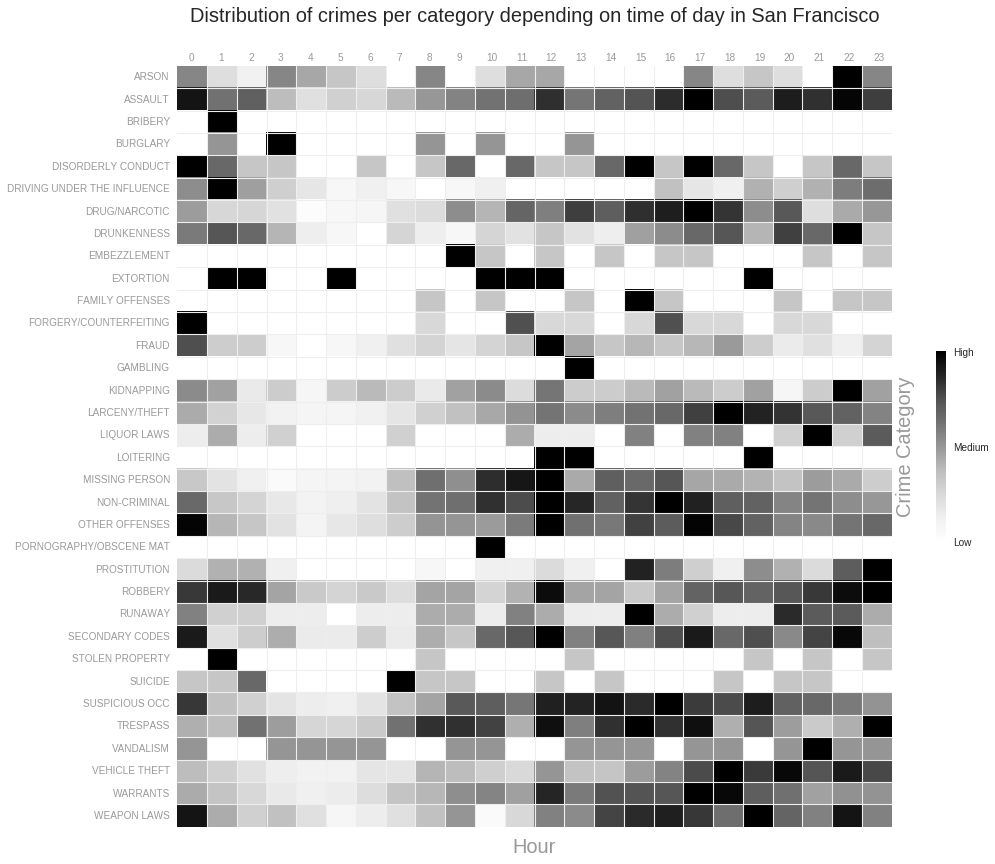

In [42]:
# draw grid on axes
fig, ax = preparePlot(np.arange(.5, 23, 1), np.arange(.5, n_categories-1, 1), figsize=(16,14), hideLabels=True,
                      gridColor='#eeeeee', gridWidth=1.1)

# interpolate crime intensity per hour on the grid
image = plt.imshow(img_src, interpolation='nearest', aspect='auto', cmap=cm.Greys)

# x-axis labels
for x, y, s in zip(np.arange(-.125, 24, 1), np.repeat(-.75, 24), [str(x) for x in range(24)]):
    plt.text(x, y, s, color='#999999', size='10')
# y-axis labels
for x, y, s in zip(np.repeat(-.75, n_categories), np.arange(.125, n_categories, 1), categories):
    plt.text(x, y, s, color='#999999', size='10', horizontalalignment="right")
plt.title("Distribution of crimes per category depending on time of day in San Francisco", size=20, y=1.05)
plt.xlabel("Hour", color='#999999', size="20")
plt.ylabel("Crime Category", color='#999999', size="20")
ax.yaxis.set_label_position("right")

# plot the colobar to show scale
cbar = fig.colorbar(image, ticks=[0, 0.5, 1], shrink=0.25, orientation='vertical')
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

plt.show()

There seems to be peak and off-peak times. From around 9am, most crimes begin and start reducing just after 12am, except for crimes that need nightlife activity to occur (e.g. prostitutuion, drunkedness, bribery); or burglaries that occur during sleeping hours early in the morning at about 1 - 3am. 

There are other crimes that seem to be less prevalent (e.g. Stolen Property, Loittering, Gambling, Pornography/obscene). But there could be other reasons for that. Perhaps less reporting or low level of extremity could be major factors.

While looking through the results in the above graph, we kind of realized a trend. Categories that are mostly associated with white collar crimes (e.g. SUSPICIOUS OCC, SECONDARY CODES, EXTORTION, EMBEZZLEMENT, FRAUD , FORGERY/COUNTERFEITING) mostly occurred during waking hours (9am - 9pm). This led to the decision to look into that notion in the next part of the analysis. 
   

# Geospatial Analysis 

### In this section of the analysis, only the San Francisco region is analyzed because of low resource factors.

##### Plotting process

In [43]:
# Packages needed for below analysis
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import pandas as pd

from descartes import PolygonPatch
import folium

from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

from itertools import chain
import os
import fiona
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Shapefile of San Francisco
SF_NEIGHBORHOODS = "SFFind_Neighborhoods"
sf_neighborhoods = os.path.join("%s.shp" % SF_NEIGHBORHOODS)
shp = fiona.open(sf_neighborhoods)
shp

<open Collection 'SFFind_Neighborhoods.shp:SFFind_Neighborhoods', mode 'r' at 0x7f2e28fe7d68>

In [45]:
# Extract map boundaries
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
# width, height of map
w, h = coords[2] - coords[0], coords[3] - coords[1]

Read SF neighborhood data into Basemap


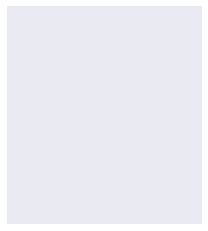

In [46]:
# Basemap used to view shapefiles
m = Basemap(
    projection='tmerc',
    lon_0=-122.,
    lat_0=37.7,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

m.readshapefile(
    os.path.join(SF_NEIGHBORHOODS),
    'SF',
    color='none',
    zorder=2)

print("Read SF neighborhood data into Basemap")

In [47]:
# Polygon shaping process of neighbourhoods
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.SF],
    'ward_name': [ward['name'] for ward in m.SF_info]})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
# Draw neighborhoods with polygons
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x,
    fc='#000000',
    ec='#ffffff', lw=.5, alpha=1,
    zorder=4))

df_map.head()

,poly,ward_name,area_m,area_km,patches
0,"POLYGON ((2079.508515252186 9333.071676798603,...",Seacliff,4.612171e+05,4.612171,"Poly((2079.51, 9333.07) ...)"
1,"POLYGON ((2635.036414107715 9359.823463632156,...",Lake Street,3.839046e+05,3.839046,"Poly((2635.04, 9359.82) ...)"
2,"POLYGON ((3493.53778018117 12375.35413749745, ...",Presidio National Park,6.141534e+06,61.415343,"Poly((3493.54, 12375.4) ...)"
3,"POLYGON ((3935.50334793127 9748.42139106528, 4...",Presidio Terrace,3.289413e+05,3.289413,"Poly((3935.5, 9748.42) ...)"
4,"POLYGON ((3915.963095660481 9634.001658473235,...",Inner Richmond,2.267182e+06,22.671817,"Poly((3915.96, 9634) ...)"


In [48]:
# We're going to choose categories that represent white collar crimes
def makePoints(dat):
    # Create Point objects in map coordinates from dataframe lon and lat values
    map_points = pd.Series([Point(m(mapped_x,mapped_y)) for mapped_x, mapped_y in zip(dat['Longitude'],dat['Latitude'])])
    plt_points = MultiPoint(list(map_points.values))
    hoods_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
    pts = filter(hoods_polygon.contains,plt_points)
    return pts

white_collar_cat = [
    "SUSPICIOUS OCC", 
    "FORGERY/COUNTERFEITING", 
    "SECONDARY CODES", 
    "EXTORTION",
    "EMBEZZLEMENT",
    "FRAUD"
]

sf_wcollar_crimes = sf_normalized[
                            (sf_normalized["City"] == SF) & 
                            (
                                (sf_normalized["TimeBin"] >= 9) | 
                                (sf_normalized["TimeBin"] <= 21)
                            ) & 
                            (sf_normalized["Category"].isin(white_collar_cat))]
sf_suspicious_occ = sf_wcollar_crimes[sf_wcollar_crimes["Category"] == white_collar_cat[0]]
sf_forgery = sf_wcollar_crimes[sf_wcollar_crimes["Category"] == white_collar_cat[1]]
sf_secondary_codes = sf_wcollar_crimes[sf_wcollar_crimes["Category"] == white_collar_cat[2]]
sf_extortion = sf_wcollar_crimes[sf_wcollar_crimes["Category"] == white_collar_cat[3]]
sf_embezzlement = sf_wcollar_crimes[sf_wcollar_crimes["Category"] == white_collar_cat[4]]
sf_fraud = sf_wcollar_crimes[sf_wcollar_crimes["Category"] == white_collar_cat[5]]

sf_wcollar_points = makePoints(sf_wcollar_crimes)
sf_sus_occ_points = makePoints(sf_suspicious_occ)
sf_forgery_points = makePoints(sf_forgery)
sf_second_codes_points = makePoints(sf_secondary_codes)
sf_extortion_points = makePoints(sf_extortion)
sf_embezzle_points = makePoints(sf_embezzlement)
sf_fraud_points = makePoints(sf_fraud)

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


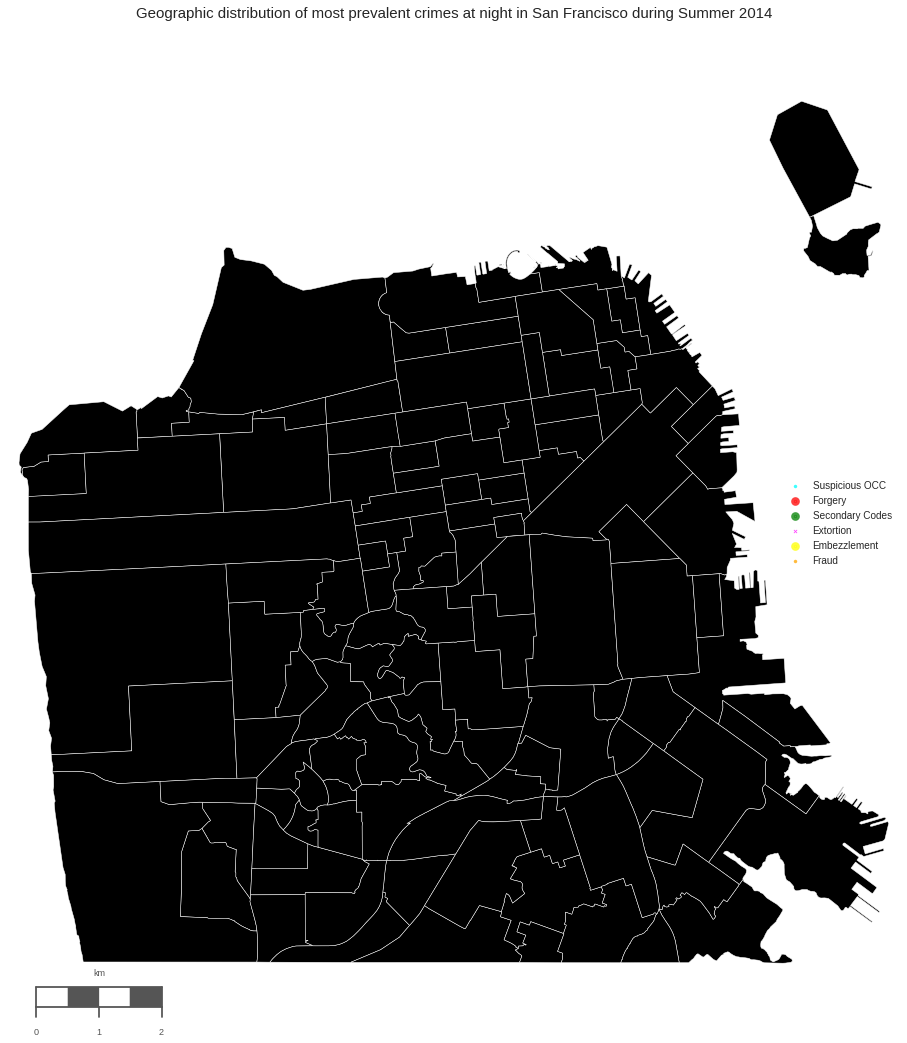

In [55]:
# Plotting procedure
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

# Scatter Suspicious OCC occurrences
dev = m.scatter(
    [geom.x for geom in sf_sus_occ_points],
    [geom.y for geom in sf_sus_occ_points],
    10, marker='o', lw=.25,
    facecolor='cyan', edgecolor='cyan',
    alpha=0.75, antialiased=True,
    label='Suspicious OCC', zorder=3)

# Scatter Forgery occurrences
dev = m.scatter(
    [geom.x for geom in sf_forgery_points],
    [geom.y for geom in sf_forgery_points],
    10, marker='o', lw=5.5,
    facecolor='red', edgecolor='red',
    alpha=0.75, antialiased=True,
    label='Forgery', zorder=3)

# Scatter Secondary Codes occurrences
dev = m.scatter(
    [geom.x for geom in sf_second_codes_points],
    [geom.y for geom in sf_second_codes_points],
    10, marker='o', lw=5.5,
    facecolor='green', edgecolor='green',
    alpha=0.75, antialiased=True,
    label='Secondary Codes', zorder=3)

# Scatter Extortion occurrences
dev = m.scatter(
    [geom.x for geom in sf_extortion_points],
    [geom.y for geom in sf_extortion_points],
    10, marker='x', lw=.75,
    facecolor='magenta', edgecolor='magenta',
    alpha=0.75, antialiased=True,
    label='Extortion', zorder=3)

# Scatter embezzlement occurrences
dev = m.scatter(
    [geom.x for geom in sf_embezzle_points],
    [geom.y for geom in sf_embezzle_points],
    10, marker='o', lw=5.5,
    facecolor='yellow', edgecolor='yellow',
    alpha=0.75, antialiased=True,
    label='Embezzlement', zorder=3)

# Scatter Fraud occurrences
dev = m.scatter(
    [geom.x for geom in sf_fraud_points],
    [geom.y for geom in sf_fraud_points],
    10, marker='o', lw=.25,
    facecolor='orange', edgecolor='orange',
    alpha=0.75, antialiased=True,
    label='Fraud', zorder=3)

ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))

m.drawmapscale(
    coords[0] + 0.015, coords[1] - 0.005,
    coords[0], coords[1],
    2.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)

plt.tight_layout()
plt.legend(loc="center right")
plt.title("Geographic distribution of most prevalent crimes at night in San Francisco during Summer 2014", size=15)
fig.set_size_inches(15,15)
plt.show()

For the above map scenario, crime reports that seem to be associated with white collar crimes were chosen.

The following above map implies a similar type of trend for white collar crimes to blue collar crimes. There seems to be similarity in terms of the location of most crime reports. The central part of the city seems to be at the heart of this scenario. But this applies to certain white collar crime reports, like Secondary Codes, Forgery, Fraud and Embezzlement. 

On the other hand this could mean that the above crimes are not only associated with upper end classes, but also less previleged classes. Although, as you go further away from the city centre, the less crime reports. There seems to be another reverse trend as you move further away from the center of the city though. Clusters occur for Suspicious OCC and Secondary Codes, but not as dense as the city central. It makes sense in terms of who those types of crimes are associated with (middle-upper income classes living in the outskirts). What then?  

## Below  we analyze 2014 and 2015 crime reports for San Francisco {The missing interactive maps can be found in the github repository in chronological order}

In [56]:
# San Francisco 2015 crime reports data
sf_2015 = pd.read_csv('SFPD_Incidents_-_Current_Year__2015_.csv')
sf2015_nrows = sf_2015.shape[0]
sf_2015.head(1)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,09/20/2015,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"


In [57]:
print(sf['District'].head())
print(sf['Category'].head())

0     BAYVIEW
1     MISSION
2    SOUTHERN
3    RICHMOND
4    RICHMOND
Name: District, dtype: object
0            ARSON
1     NON-CRIMINAL
2    LARCENY/THEFT
3    LARCENY/THEFT
4     NON-CRIMINAL
Name: Category, dtype: object


In [58]:
# Cluster map of descriptive 2014 data
from folium.plugins import MarkerCluster

#for speed purposes
n = 1000
lons=sf.Longitude[0:n]
lats=sf.Latitude[0:n]

locations = list(zip(lats, lons))
#popups = [each[1]['Category'] + ": " + each[1]['Destrict'].format(each) for each in locations]
#popups = ['{}'.format(loc) for loc in locations]


mapa = folium.Map(location=[np.mean(lats), np.mean(lons)],zoom_start=1)
mapa.add_children(MarkerCluster(locations=locations, popups=sf['District'] + ": " + sf['Category']))

mapa


### To interact with the maps, click on the beacons (in numbers) for more descriptive mapping of the data.

In [ ]:
# Cluster map of descriptive 2015 data

#for speed purposes
n = 1000
lats2=sf_2015.Y[0:n]
lons2=sf_2015.X[0:n]

locations2 = list(zip(lats2, lons2))
#popups = [each[1]['Category'] + ": " + each[1]['Destrict'].format(each) for each in locations]
#popups = ['{}'.format(loc) for loc in locations]


mapa2 = folium.Map(location=[np.mean(lats2), np.mean(lons2)],zoom_start=1)
mapa2.add_children(MarkerCluster(locations=locations2, popups=sf_2015['PdDistrict'] + ": " + sf_2015['Category']))

mapa2


In [ ]:
# Cluster map of descriptive 2014 data
SF_COORDINATES = (37.76, -122.45)

#definition of the boundaries in the map
district_geo = r'sfpddistricts.geojson'

#calculating total number of incidents per district
crimedata2 = pd.DataFrame(sf['District'].value_counts().astype(float))  
crimedata2.to_json('crimeagg.json')  
crimedata2 = crimedata2.reset_index()  
crimedata2.columns = ['District', 'Number']

#creation of the choropleth
map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)  
map1.geo_json(geo_path = district_geo,  
              data_out = 'crimeagg.json', 
              data = crimedata2,
              columns = ['District', 'Number'],
              key_on = 'feature.properties.DISTRICT',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of incidents per district')

map1

In [ ]:
# Cluster map of descriptive 2015 data

#definition of the boundaries in the map
district_geo = r'sfpddistricts.geojson'

#calculating total number of incidents per district
crimedata3 = pd.DataFrame(sf_2015['PdDistrict'].value_counts().astype(float))  
crimedata3.to_json('crimeagg2.json')  
crimedata3 = crimedata3.reset_index()  
crimedata3.columns = ['District', 'Number']

#creation of the choropleth
map2 = folium.Map(location=SF_COORDINATES, zoom_start=12)  
map2.choropleth(geo_path = district_geo,  
              data_out = 'crimeagg2.json', 
              data = crimedata3,
              columns = ['District', 'Number'],
              key_on = 'feature.properties.DISTRICT',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of incidents per district')

map2

### The last two maps show an increase in reported crime incidences from  2014 - 2015 (about three to four times more than the previous year). This is more prevalent in the Northern District of San Francisco. 

The first two maps portray a more heavily clustered Southern (2014) and Northern (2015) Destricts. In 2014, the most clustered region was the Southern destrict. Although, as 2015 commenced, that region reduced dramatically while the opposite happened for the Northern Destrict. One reason for such a trend could be less or more crime reporting for each region between two consecutive years. Another could be, because of more crime reporting in one region, increased police petrols in that region occurred, which led to the crimes moving to the next likely region with higher intensity. This could explain the higher growth in reports from one year to the next.

This is most common in most cities across the world in terms of most clustered regions with high crime reports, which are centered in and around city centers torwards the less previleged regions of that particular city. In this case, from the Central District torwards the Southern and Northern Destricts is the order of the day.  

# Comparing two cities

### Comparing the two cities (San Francisco and Seattle) to find trends that correlate directly or inversely in terms of white collar crime 

We have come to understand different types of crimes that occur in San Francisco: which could correlate with the change of seasons; those that occur during the day or night, or both; white collar crimes that cluster with regional changes; and the cluster changes between different regions from one year to the next.

Next we're going to compare similarity between different cities (San Francisco and Seattle). The similarity will distingiush whether the two cities share the same types of crimes in terms of number of reports. We decided to use a lite hierarchical clustering algorithm because in order to analyze similarities, we first have to normalize the data to prevent overfitting (high variance) and/or underfitting (low bias). 

The below process will involve firstly filtering data that doesn't belong for camparison reasons (no significance between cities = no reason to compare). Secondly, we'll normalize the data for better comparing of cities. Then lastly we'll output the results with a visual for better understanding of the process.

#### Firstly we need to filter out the categories that have low or no significance. Since we decided to understand white collar crimes that occur with the change in region within a city, we're only going to analyze the ones that are reported during the day (9am - 7pm). 

In [ ]:
# Filtering and normalizing process

# only keep daylight crimes
gb = dataset[(dataset["TimeBin"] >= 6) | (dataset["TimeBin"] <= 19)].groupby("Category")
cat_city = gb["City"].value_counts().unstack().fillna(0)

# filter out crimes which don't have an occurrence in both cities
cat_nonnull = cat_city[(cat_city[SF] > 0) & (cat_city[SEATTLE] > 0)]
print("Crime categories not in both cities:")
print(cat_city[(cat_city[SF] == 0) | (cat_city[SEATTLE] == 0)])

# normalize the distribution of crimes so that each rows adds up to 1
cat_norm = cat_nonnull.div(cat_nonnull.sum(axis=1), axis=0)

cat_norm.head()

In [ ]:
# Seaborn is used for visualizing above results
import seaborn as sns

g = sns.clustermap(cat_norm, annot=True, cmap="Blues", fmt="g")
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
g.fig.suptitle("Normalized distribution and clustering of crimes between San Francisco and Seattle", size=15)
plt.show()

Since white collar crime is analyzed; Suspicious OCC, Secondary Codes and Extortion don't occur in both cities, therefore were filtered out.  

Here are the results for the remaining categories that are associated with white collar crimes: 


Forgery/Counterfeiting: SF- 0.08 : SEATTLE- 0.92;
Embezzlement:           SF- 0.15 : SEATTLE- 0.85;
Fraud:                  SF- 0.14 : SEATTLE- 0.86;

The above results signify that since the significance values don't or even closely match, while the other categories where filtered out, The two cities don't share similarities in terms of white collar crime.

On the other hand, there are similarities between the two cities that are more considered to be blue collar crimes.

Here are the results for those:


ASSAULT:               SF- 0.56 : SEATTLE- 0.44;
LARCENY/THEFT:         SF- 0.44 : SEATTLE- 0.56;
LIQUOR LAWS:           SF- 0.47 : SEATTLE- 0.53;

This means that the two cities do share some similarity results in terms of crime incidences, but only a small portion of the overall list of categories. The rest of the categories share similar outcomes as the white collar categories (no or little significance).  


# Conclusion

To conclude the overall analysis of the theme at hand for the San Francisco and Seattle cities, especially San Francisco, brings about a few notions to consider. It's clear that most reported crime incidences occur in the daylight. A reason could be that most people are a sleep at night, actually maybe even most criminals.  

The most populated regions have the most crime reports, and there seems to be increases of crime reports from 2014 - 2015. This could be because of income gap reasons.  

Blue collar crime is the most reported and located mostly from the city center towards overpopulated and underpriveleged regions. 

White collar crime also follows the same trend in terms of cluster density, but also has less dense clusters in the outskirts of the city centre. Reasons for this particular pattern could be less reporting, or, data sources being hard to reach could be THEE major player to the overall theme at hand.   